### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None) # default 50
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns

# Reading data

In [2]:
data_dict = pd.read_excel('Leads Data Dictionary.xlsx', header=2)
data_dict = data_dict.iloc[:,1:]
data_dict = data_dict.set_index('Variables')
data_dict = data_dict.fillna(method='ffill')
data_dict

,Description
Variables,
Prospect ID,A unique ID with which the customer is identified.
Lead Number,A lead number assigned to each lead procured.
Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."
Lead Source,"The source of the lead. Includes Google, Organic Search, Olark Chat, etc."
Do Not Email,An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
Do Not Call,An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
Converted,The target variable. Indicates whether a lead has been successfully converted or not.
TotalVisits,The total number of visits made by the customer on the website.
Total Time Spent on Website,The total time spent by the customer on the website.


In [3]:

df = pd.read_csv('Leads.csv')

## Head, shape, info

In [4]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
df.shape

(9240, 37)

# Exploratory Data Analysis

## Missing Values

### Replacing occurences of 'Select' with NaN
Many of the categorical variables have a level called 'Select' which is a null value. It corresponds to a situation where a user, while filling an online form didn't select any options from a dropdown menu.

In [6]:
df = df.replace('Select', np.nan)

### Plotting missing value plots

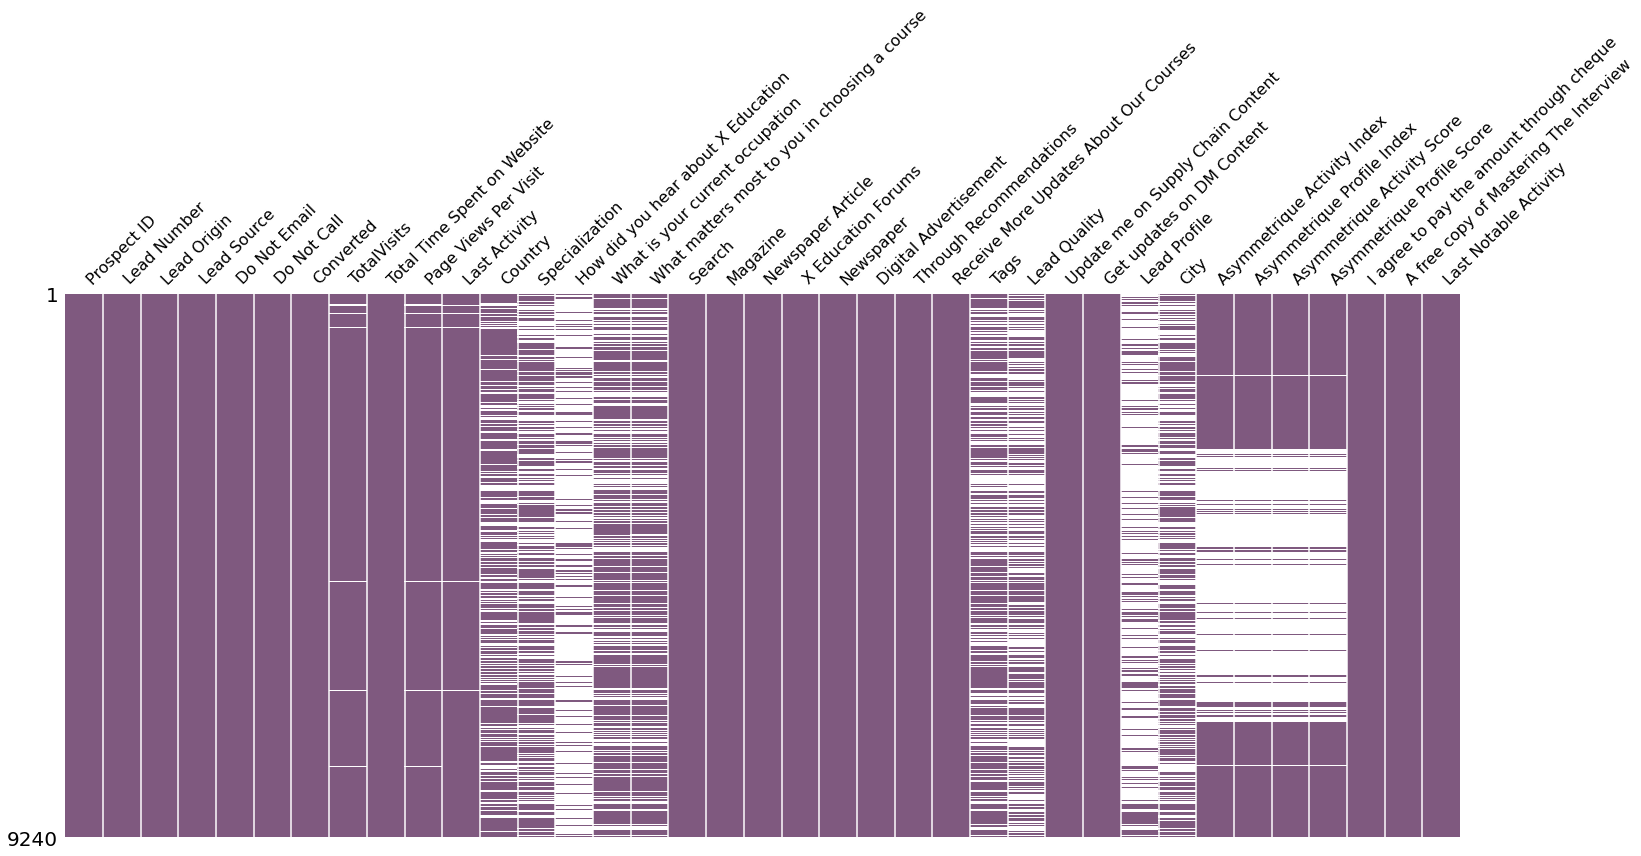

In [7]:
import missingno as msno
color = .5, 0.35, 0.5
msno.matrix(df, sparkline=False, color=color);

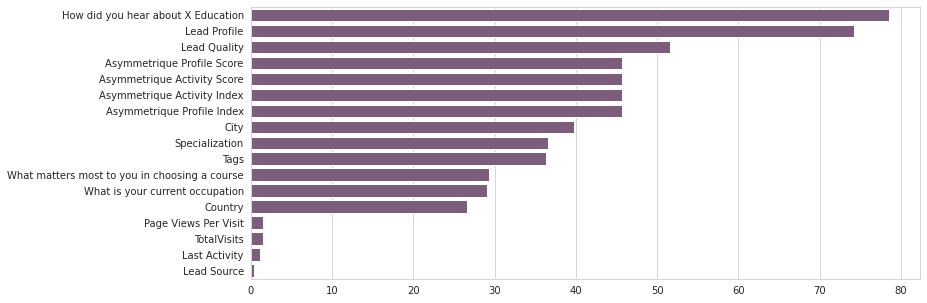

In [8]:
nans = df.isna().sum().sort_values(ascending=False)/len(df)*100
nans = nans[~(nans==0)] #removing 0s
sns.set_style(style='whitegrid')
with sns.plotting_context(font_scale=0.6):
    plt.figure(figsize=[12,5])
    sns.barplot(x = nans, y = nans.index, color=color)
    plt.show()

## Univariate Analysis (first pass)
Inspect each column and take appropriate actions like  
- Dropping useless columns
- Creating dummy variables
- Cleaning values, converting into appropriate dtypes

### Plotting functions

In [9]:
def value_counts(series: 'pd.Series'):
    """
    Outputs value counts of a pandas Series in the form
    of a nice Dataframe.
    """
    total_rows, nans = series.shape[0], series.isna().sum()
    counts = pd.DataFrame(series.value_counts())
    counts = pd.DataFrame(index=['NaNs'], columns=counts.columns,
                          data=[nans]).append(counts)
    counts_norm = pd.DataFrame(counts / total_rows)
    df = pd.merge(counts, counts_norm, left_index=True, right_index=True)
    df.columns = pd.MultiIndex.from_arrays(
        [[series._name, series._name],
         ['Counts', 'Normalised']])
    return df
city = value_counts(df['City'])
city

City           
                            Counts Normalised
NaNs                          3669   0.397078
Mumbai                        3222   0.348701
Thane & Outskirts              752   0.081385
Other Cities                   686   0.074242
Other Cities of Maharashtra    457   0.049459
Other Metro Cities             380   0.041126
Tier II Cities                  74   0.008009

In [10]:
cols = df.columns.drop(['Prospect ID', 'Lead Number'])

In [11]:
import ipywidgets as widgets
from ipywidgets import VBox, HBox, interactive_output
from IPython.display import clear_output
sns.set_theme('notebook', palette='turbo')
col = widgets.Dropdown(
        options=cols,
        description='Column',
        disabled=False)
def f(col):
    print(f'Description of {col}')
    print(str(df[col].describe()))
def g(col):
    plt.figure(dpi=90)
    sns.scatterplot(y=df[col].value_counts(),x=df[col].value_counts().index)
    plt.title('Value Counts')
    plt.xticks(rotation=90)
    plt.show()
def h(col):
    def value_counts_(series: 'pd.Series'):
        total_rows, nans = series.shape[0], series.isna().sum()
        counts = pd.DataFrame(series.value_counts())
        counts = pd.DataFrame(index=['NaNs'], columns=counts.columns,
                              data=[nans]).append(counts)
        counts_norm = pd.DataFrame(counts / total_rows)
        df = pd.merge(counts, counts_norm, left_index=True, right_index=True)
        df.columns = pd.MultiIndex.from_arrays(
            [[series._name, series._name],
             ['Counts', 'Normalised']])
        return df
    display(value_counts_(df[col]), )
def i(col):
    try: print(data_dict.loc[col].values[0])
    except: print(col)

def j(col):
    try:
        plt.figure(dpi=90)
        plt.xticks(rotation=90)
        sns.histplot(df[col], kde=True)
        plt.plot()
    except: return 'Unsupported Data for Univariate distplot'
hist_button = widgets.Button(description='View Distribution')
histogram = widgets.Output()
def on_button_clicked(_):
      with histogram:
          clear_output()
          display(interactive_output(j, {'col':col}))
hist_button.on_click(on_button_clicked)

describe =         interactive_output(f, {'col': col})
value_count_plot = interactive_output(g,{'col':col})
value_counts =     interactive_output(h,{'col':col})
line =             widgets.Output(layout={'border': '1px solid black'})
description =      interactive_output(i, {'col':col})

### Widget

In [12]:
HBox([VBox([col, describe, line,value_counts],box_style='info'),
      line,
      VBox([description, line,value_count_plot, line, hist_button, histogram]) ])

### Actions

- `Prospect ID` : It's an unique string, **dropping**. 
- `Lead Number` : It's an unique id, **dropping it**.
- `Lead Origin` : *'Quick Add Form'* method was used by a single user, replacing it with *'Lead Add Form'*.  
- `Lead Source` : It has various levels which can be combined together based on meaning. We will try bin them based on the ratio of succesfull conversions. 
- `Do Not Email` : Its too unbalanced (92%), **dropping**.
- `Do Not Call` : Its too unbalanced (99.9%), **dropping**.
- `Converted` : Its the **target variable**.
- `TotalVisits` : The data is very skewed, **Later:** transform it to make it look more normal.
- `Total Time Spent on Website` : The data is very skewed, **Later:** transform it to make it look more normal.
- `Page Views Per Visit` : The data is very skewed, **Later:** transform it to make it look more normal.
- `Last Activity` : *Variable not relevant* **dropping it**
- `Country` : 26% values are NaN, but rest of the values are 95% *'India'*, hence imputing NaNs with it.
- `Specialization` : 36% are NaNs hence **dropping it**. Later: impute missing values and add to model for better performance.
- `How did you hear about X Education` : 78% NaNs hence **dropping it**.
- `What is your current occupation` : 30% are NaNs and rest 60% are *'Unemployed'*; imputing NaNs with mode
- `What matters most to you in choosing a course` : This column has only 3 rows which are not *'Better Career Prospects'* or NaNs hence **dropping it**.  Later: impute missing values and add to model for better performance.
- `Search` : Highly imbalanced (99.8%) hence **dropping it**.  Later: impute missing values and add to model for better performance.
- `Magazine` : Whole column is a single value hence **dropping it**. 
- `Newspaper Article` : Highly imbalanced (99.99%) hence **dropping it**.
- `X Education Forums` : Highly imbalanced (99.99%) hence **dropping it**.
- `Newspaper` : Highly imbalanced (99.99%) hence **dropping it**.
- `Digital Advertisement` : Highly imbalanced (99.99%) hence **dropping it**.
- `Through Recommendations` : Highly imbalanced (99.99%) hence **dropping it**.
- `Receive More Updates About Our Courses` : Whole column is a single value hence **dropping it**.
- `Tags` : *Variable not relevant* **dropping it**
- `Lead Quality` : *Variable not relevant* **dropping it**
- `Update me on Supply Chain Content` : Whole column is a single value hence **dropping it**.
- `Get updates on DM Content` : Whole column is a single value hence **dropping it**.
- `Lead Profile` : *Variable not relevant* **dropping it**
- `City` : 40% NaNs hence **dropping it**.
- `Asymmetrique Activity Index` : *Variable not relevant* **dropping it**
- `Asymmetrique Profile Index` : *Variable not relevant* **dropping it**
- `Asymmetrique Activity Score` : *Variable not relevant* **dropping it**
- `Asymmetrique Profile Score` : *Variable not relevant* **dropping it**
- `I agree to pay the amount through cheque` : *Variable not relevant* **dropping it**
- `A free copy of Mastering The Interview` : Fine column. 
- `Last Notable Activity` : *Variable not relevant* **dropping it**


In [13]:
to_keep = ['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
           'Total Time Spent on Website', 'Page Views Per Visit', 'Country',
           'What is your current occupation', 'A free copy of Mastering The Interview']
df_filtered = df.filter(to_keep, axis='columns')
df_filtered['Lead Origin'] = df_filtered['Lead Origin'].replace(to_replace={'Quick Add Form':'Lead Add Form',
                                                          'Lead Import': 'Lead Add Form'})
df_filtered.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0.0,0,0.0,NaN,Unemployed,No
1,API,Organic Search,0,5.0,674,2.5,India,Unemployed,No
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,India,Student,Yes
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,India,Unemployed,No
4,Landing Page Submission,Google,1,2.0,1428,1.0,India,Unemployed,No


In [14]:
col = 'Lead Source'
def value_count_with_target_var(col, df=df):
    df[df['Converted']==1][col]
    converted_yes = df[df['Converted']==1][col].value_counts()
    converted_no = df[df['Converted']==0][col].value_counts()
    temp = pd.DataFrame(data=[converted_no, converted_yes], index=['No', 'Yes']).T
    temp['percent_yes'] = (temp['Yes'] / (temp['No']+temp[ 'Yes']))*100
    return temp
temp = value_count_with_target_var(col)
temp.sort_values('percent_yes', ascending=False).tail()

,No,Yes,percent_yes
welearnblog_Home,1.0,NaN,NaN
blog,1.0,NaN,NaN
Live Chat,NaN,2.0,NaN
WeLearn,NaN,1.0,NaN
NC_EDM,NaN,1.0,NaN


In [15]:
def plot_percentage_converted(col, df=df):
    to_plot = value_count_with_target_var(col, df)
    to_plot = to_plot.sort_values('percent_yes',ascending=False)
    labels = to_plot.index
    converted, converted_not = to_plot.Yes, to_plot.No
    fig, ax = plt.subplots(figsize=(15,int(len(to_plot)/3.5)+2), dpi=80)
    ax.barh(labels, converted_not.fillna(0),  label='Not Converted')
    ax.barh(labels, converted.fillna(0),  label='Converted', left=converted_not)
    ax.set_ylabel('Levels')
    ax.set_title(f'Value Counts of "{col}" with conversions')
    ax.legend(loc='upper right')
    ax2 = ax.twinx()
    ax2.barh(labels, 0)
    ax2.set_yticklabels(to_plot.percent_yes.round(1).fillna('nan').astype(str))
    ax2.set_ylabel('Percentage of Converted')
    ax2.grid(b=None)
    plt.show()

<ipython-input-15-c2d254230d04>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(to_plot.percent_yes.round(1).fillna('nan').astype(str))


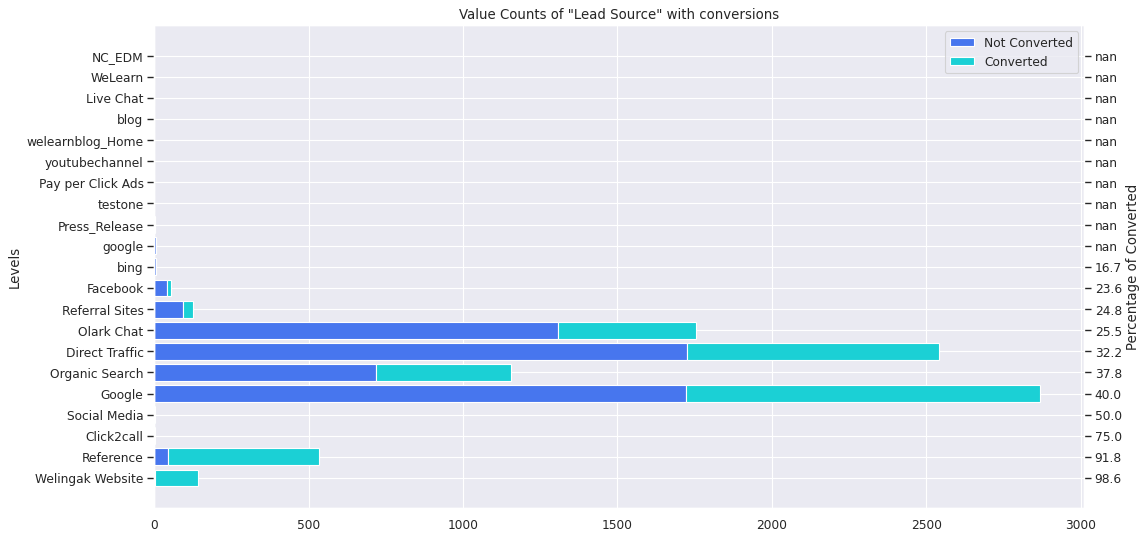

In [16]:
col = 'Lead Source'
plot_percentage_converted(col)

In [17]:
bins = dict(
    referenced = ['Welingak Website', 'Reference', 'WeLearn'],
    search_engines = ['Organic Search', 'Google', 'google', 'bing', 'Direct Traffic', 'Pay per Click Ads'],
    social_referral_links = ['Facebook', 'Referral Sites', 'Social Media', ],
    original_content = ['blog', 'welearnblog_Home', 'Press_Release', 'youtubechannel', 'NC_EDM', 'testone'],
    sales_team = ['Click2call', 'Olark Chat', 'Live Chat'])
map_dict = {}
for i in bins:
    map_dict.update(dict.fromkeys(bins[i], i))
df_filtered['Lead Source'] = df_filtered['Lead Source'].replace(map_dict)
df_filtered['Lead Source'].value_counts()

search_engines           6577
sales_team               1761
referenced                677
social_referral_links     182
original_content            7
Name: Lead Source, dtype: int64

In [18]:
from sklearn.preprocessing import PowerTransformer
yeo_j = PowerTransformer()

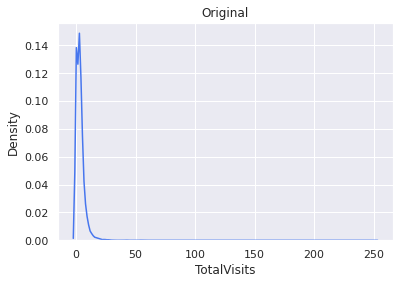

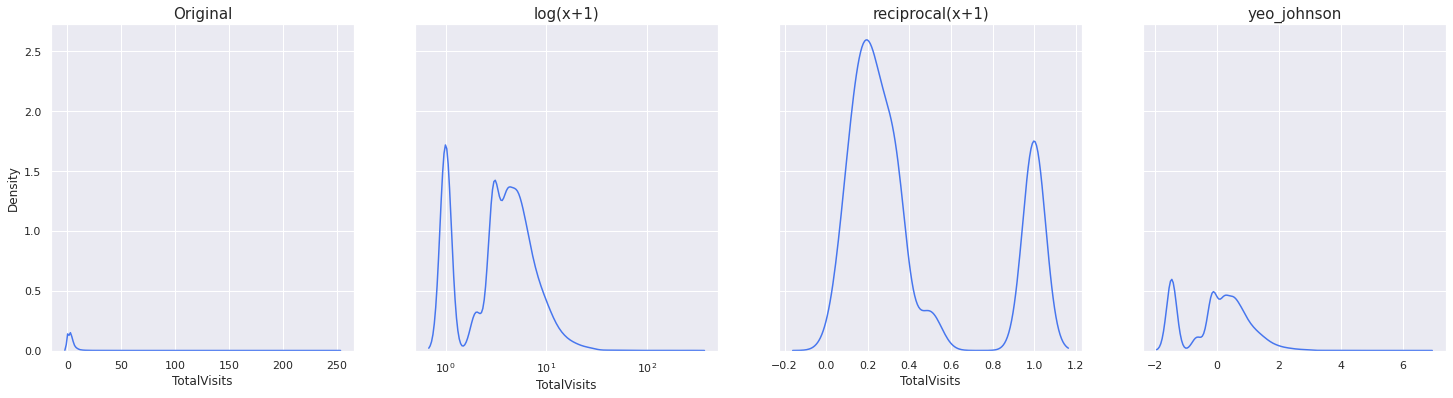

In [19]:
col = 'TotalVisits'
original = df_filtered['TotalVisits']
log_x_plus_1 = np.log10(df_filtered['TotalVisits']+1)
reciprocal = np.power(df_filtered['TotalVisits']+1, -1)
yeo_johnson = yeo_j.fit_transform(df_filtered['TotalVisits'].values.reshape(-1,1))

ncols, nrows = 1, 4
sns.kdeplot(original).set_title('Original')
fig, ax = plt.subplots(ncols, nrows, figsize=(5*(nrows+1), 6), sharey=True)
sns.kdeplot(original, ax=ax[0]).set_title('Original', fontsize=15)
sns.kdeplot(original+1, ax=ax[1], log_scale=True).set_title('log(x+1)', fontsize=15)
sns.kdeplot(reciprocal, ax=ax[2]).set_title('reciprocal(x+1)', fontsize=15)
sns.kdeplot(yeo_johnson.reshape(-1), ax=ax[3]).set_title('yeo_johnson', fontsize=15);

In [20]:
df_filtered['Country'] = df_filtered.Country.fillna('India')
df_filtered['What is your current occupation'].fillna('Unemployed', inplace=True)

In [21]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
col = 'A free copy of Mastering The Interview'
df_filtered[col] = enc.fit_transform(df_filtered[col].values)
df_filtered.head()


,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,What is your current occupation,A free copy of Mastering The Interview
0,API,sales_team,0,0.0,0,0.0,India,Unemployed,0
1,API,search_engines,0,5.0,674,2.5,India,Unemployed,0
2,Landing Page Submission,search_engines,1,2.0,1532,2.0,India,Student,1
3,Landing Page Submission,search_engines,0,1.0,305,1.0,India,Unemployed,0
4,Landing Page Submission,search_engines,1,2.0,1428,1.0,India,Unemployed,0


In [22]:
cols = ['Country', 'What is your current occupation']
pd.get_dummies(data=df_filtered, columns=cols)

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,API,sales_team,0,0.0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,API,search_engines,0,5.0,674,2.50,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,search_engines,1,2.0,1532,2.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,search_engines,0,1.0,305,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,search_engines,1,2.0,1428,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,search_engines,1,8.0,1845,2.67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9236,Landing Page Submission,search_engines,0,2.0,238,2.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9237,Landing Page Submission,search_engines,0,2.0,199,2.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9238,Landing Page Submission,search_engines,1,3.0,499,3.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# kodcesuhxki

# Questions
    1. Which are the top three variables in your model which contribute most towards the probability of a lead getting converted?

    2. What are the top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion?

    3. X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.

    4. Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.
